In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading dataset
df=pd.read_csv("/content/drive/MyDrive/datasets(1)/PCOS_data_without_infertility.xlsx - Full_new.csv")

In [ ]:
df.info()

In [ ]:
df.head()

,Sl. No,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N)
0,1,1,28,44.6,152.0,19.304017,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0
1,2,2,36,65.0,161.5,24.921163,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0
2,3,3,33,68.8,165.0,25.270891,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,1
3,4,4,37,65.0,148.0,29.674945,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0
4,5,5,25,52.0,161.0,20.060954,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0


In [ ]:
#df["BMI"]=(df["Weight (Kg)"])/(df["Height(Cm)"]*df["Height(Cm)"]*0.0001)
#df["Waist:Hip Ratio"]=df["Waist(inch)"]/df["Hip(inch)"]
#df["FSH/LH"]=df["FSH(mIU/mL)"]/df["LH(mIU/mL)"]

In [ ]:
#checking null values in dataset
df.isnull().sum()

In [ ]:
#the rows with null values are droped
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
#checking for duplicate rows
df.duplicated().sum()

0

In [ ]:
#droping duplicates if any
df.drop_duplicates()

In [ ]:
#droping unnecessay columns
df.drop(["Sl. No","Patient File No."],axis=1,inplace=True)

In [ ]:
#correcting incorrect data
df.loc[df["II    beta-HCG(mIU/mL)"]=="1.99."]

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N)
123,23,40.0,150.0,17.777778,15,74,18,10.8,2,5,...,1.0,1,100,70,10,13,18.0,17.0,12.5,1


In [ ]:
df.at[123,"II    beta-HCG(mIU/mL)"]=1.99

In [ ]:
df["II    beta-HCG(mIU/mL)"].loc[df.index[123]]

1.99

In [ ]:
df.loc[df["AMH(ng/mL)"]=="a"]

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N)
305,37,56.0,152.0,24.238227,13,74,20,11.7,2,5,...,0.0,1,120,70,4,5,17.0,16.0,5.6,0


In [ ]:
df.drop(305,axis=0,inplace=True)

In [ ]:
#datatype handling
df['II    beta-HCG(mIU/mL)']=df['II    beta-HCG(mIU/mL)'].astype(float)
df['AMH(ng/mL)']=df['AMH(ng/mL)'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    Age (yrs)              538 non-null    int64  
 1   Weight (Kg)             538 non-null    float64
 2   Height(Cm)              538 non-null    float64
 3   BMI                     538 non-null    float64
 4   Blood Group             538 non-null    int64  
 5   Pulse rate(bpm)         538 non-null    int64  
 6   RR (breaths/min)        538 non-null    int64  
 7   Hb(g/dl)                538 non-null    float64
 8   Cycle(R/I)              538 non-null    int64  
 9   Cycle length(days)      538 non-null    int64  
 10  Marraige Status (Yrs)   538 non-null    float64
 11  Pregnant(Y/N)           538 non-null    int64  
 12  No. of aborptions       538 non-null    int64  
 13    I   beta-HCG(mIU/mL)  538 non-null    float64
 14  II    beta-HCG(mIU/mL)  538 non-null    fl

In [ ]:
#categorical features
cat_col=list(df.columns[df.nunique()==2])

In [ ]:
cat_col.append("Blood Group")

In [ ]:
print(cat_col)

['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'PCOS (Y/N)', 'Blood Group']


In [ ]:
#numerical features
num_col = [x for x in list(df.columns) if x not in cat_col]

In [ ]:
print(num_col)

[' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


**UNIVARIATE ANALYSIS**

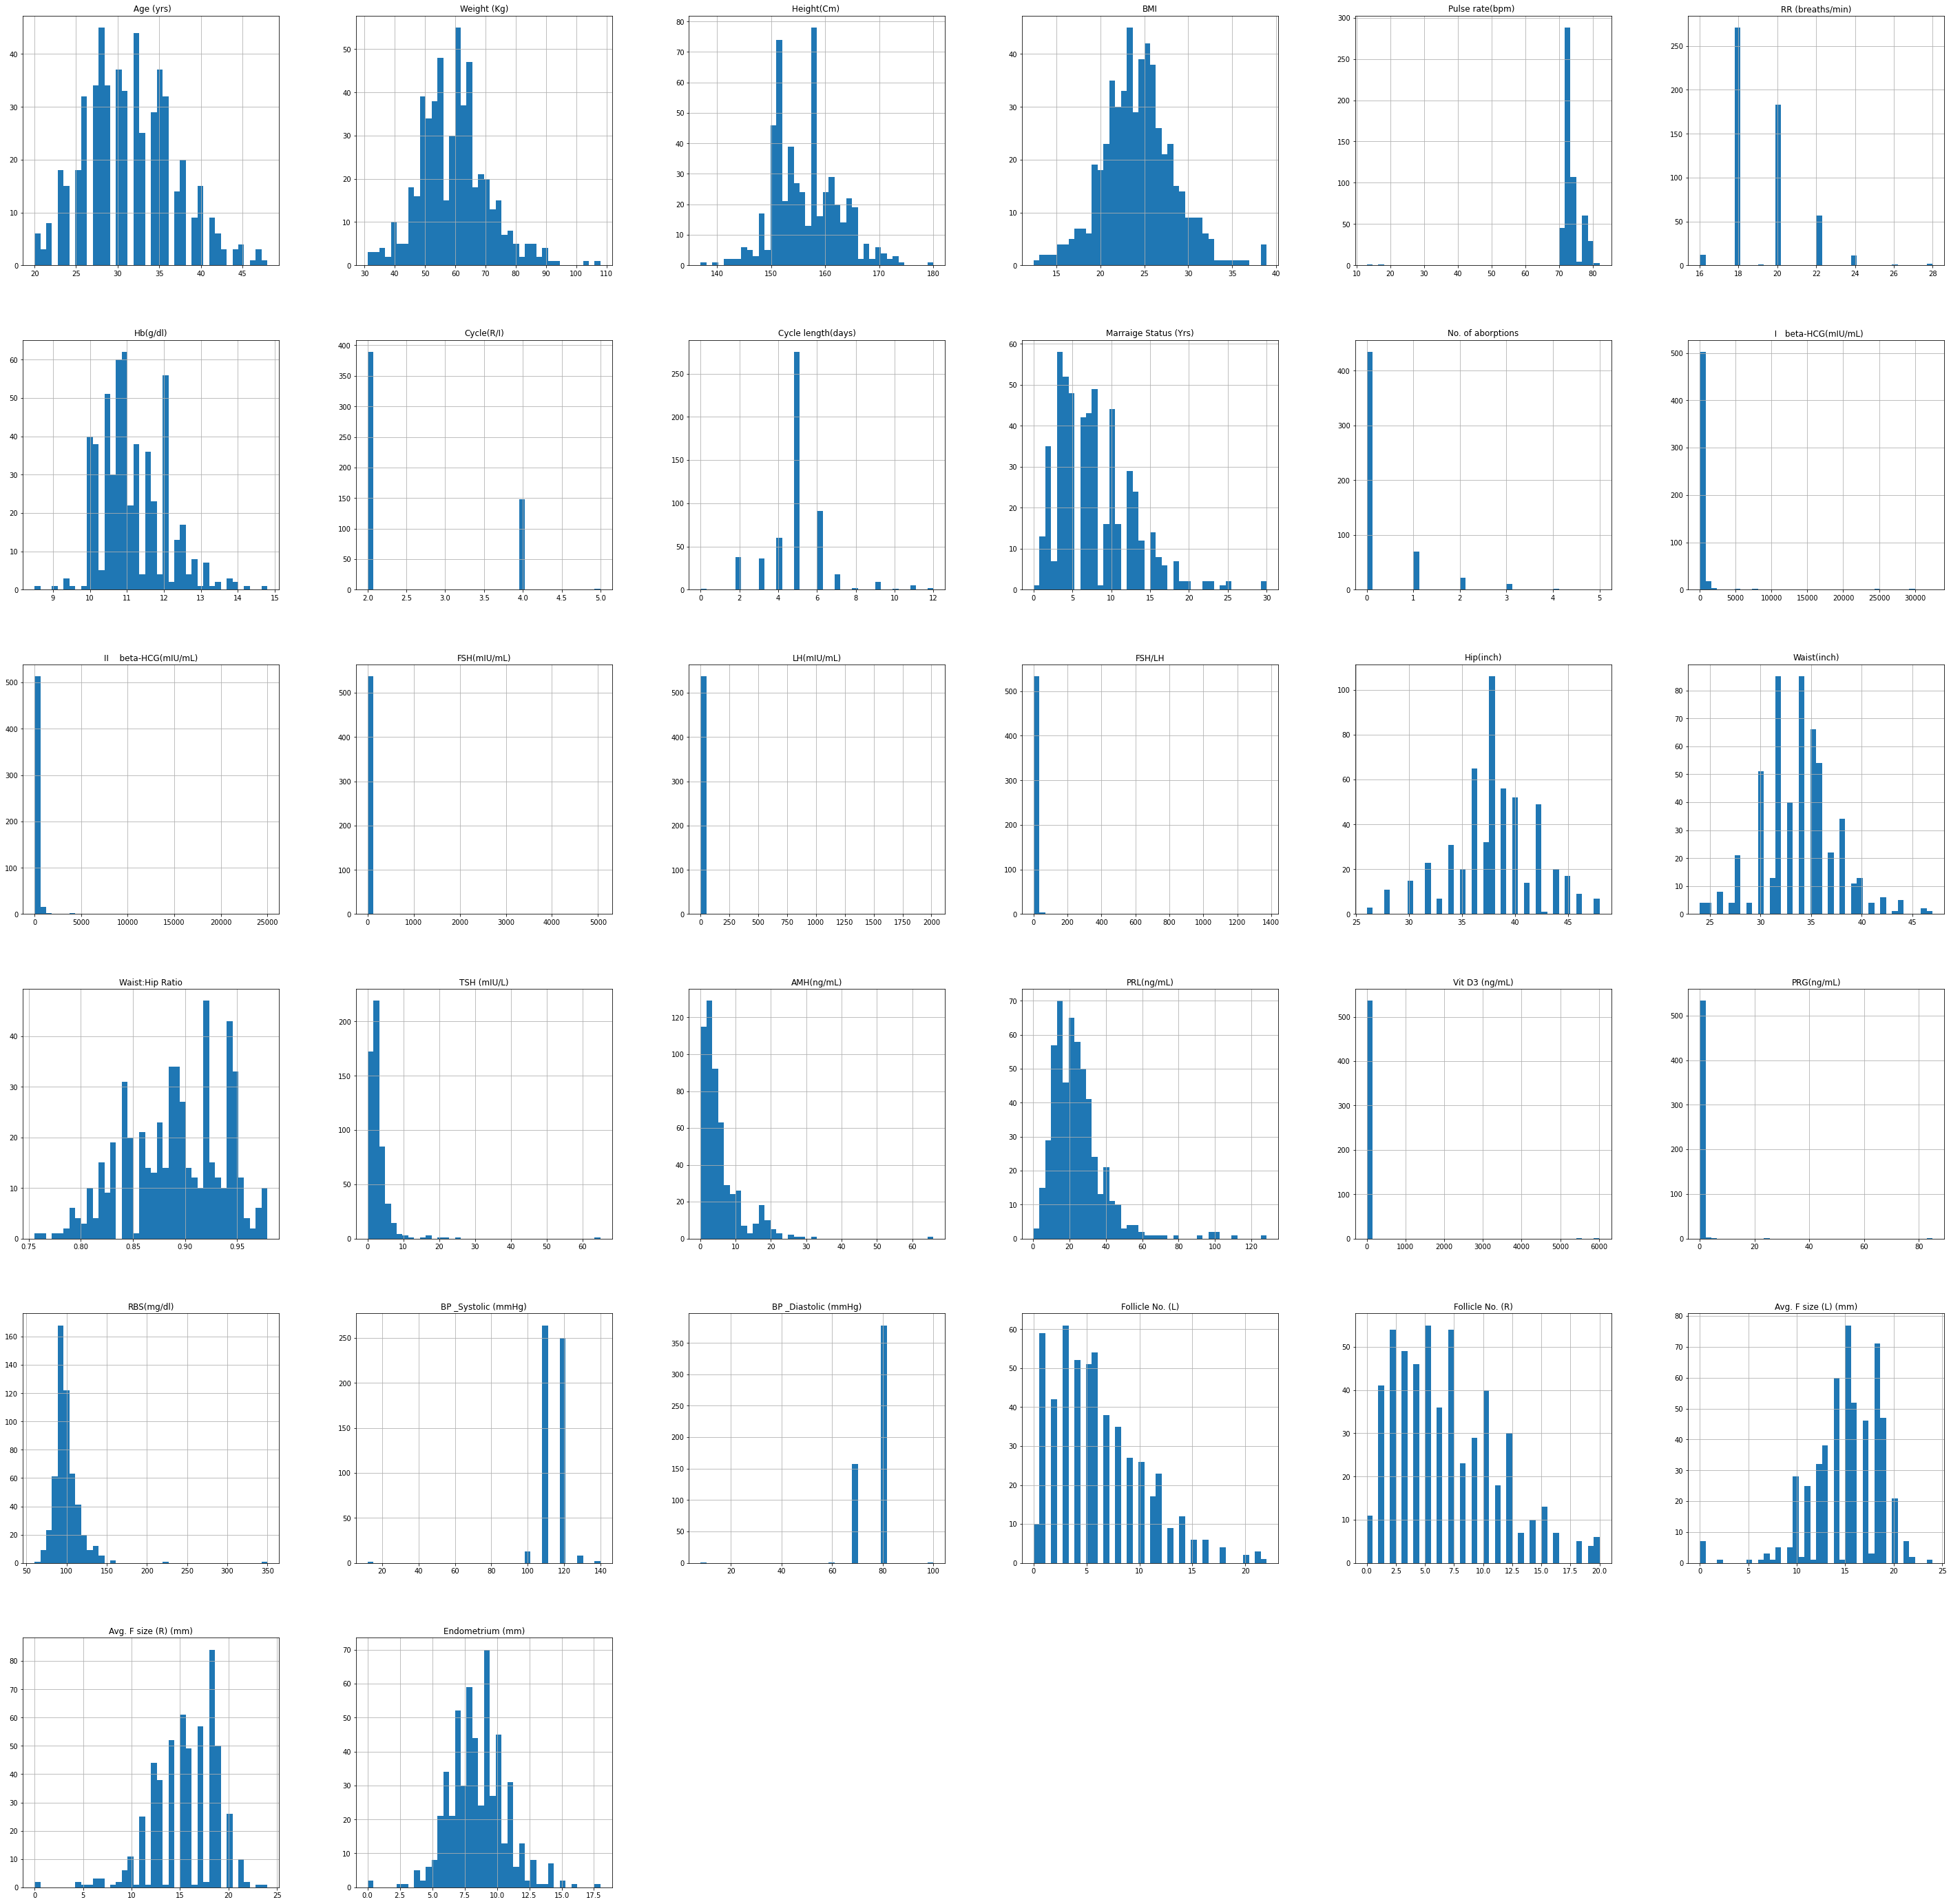

In [ ]:
#histogram
df[num_col].hist(bins=40,figsize=(50,50))
plt.show()

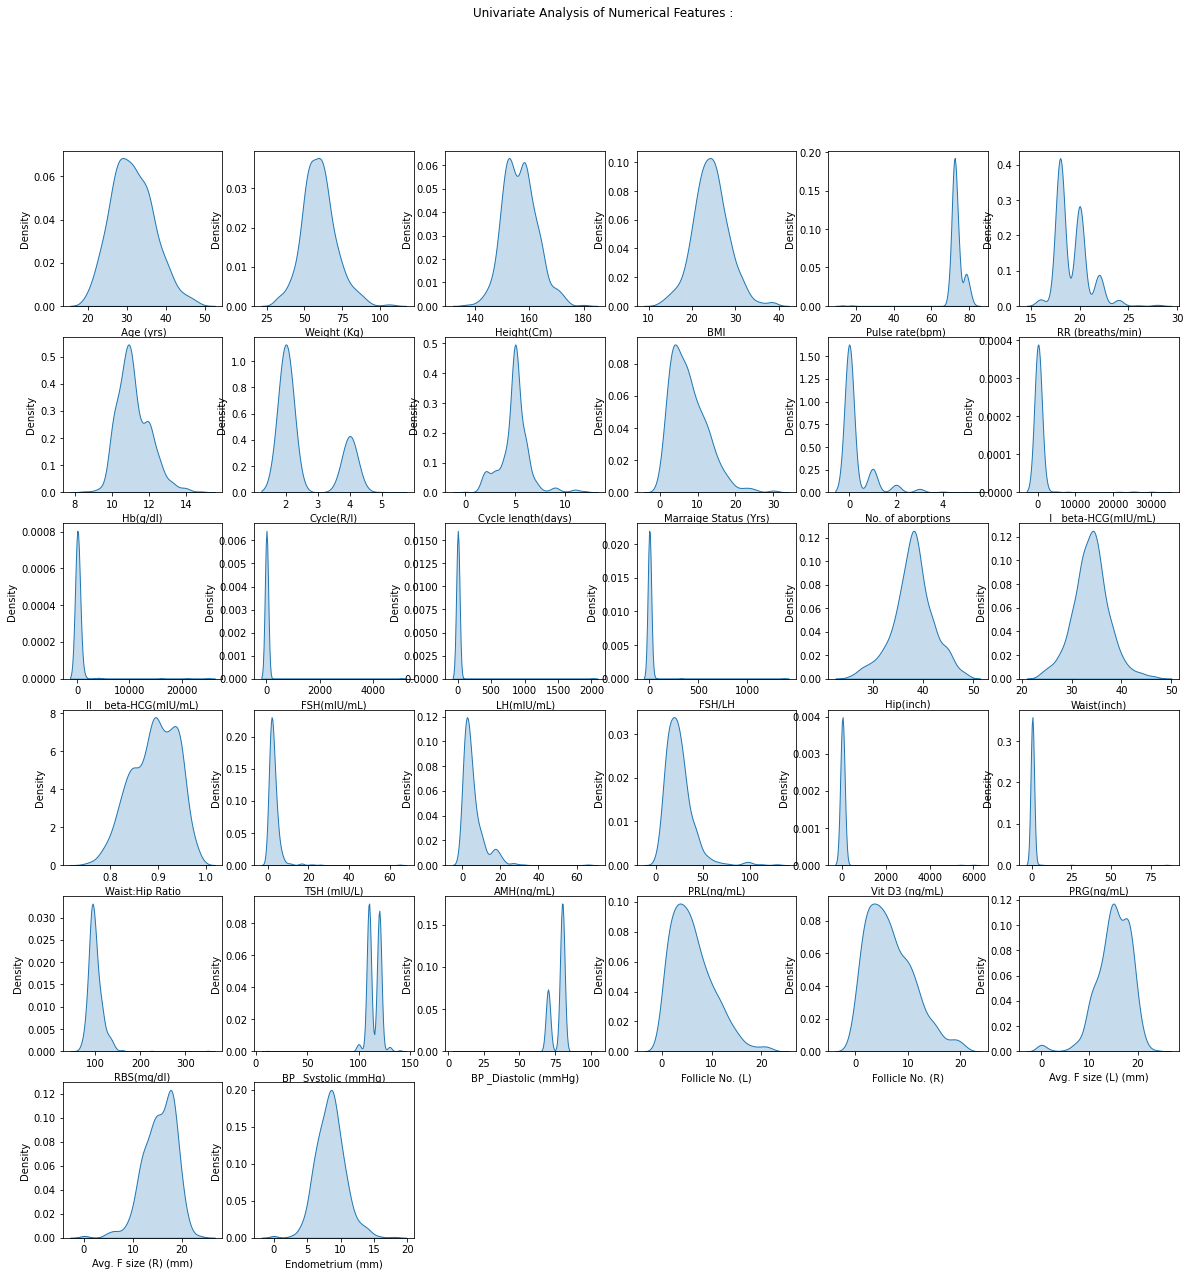

In [ ]:
#distribution plot
plt.figure(figsize=[20,20])
plt.suptitle("Univariate Analysis of Numerical Features :")
for i in range(0,len(num_col)):
  plt.subplot(6,6,i+1)
  sns.kdeplot(x=df[num_col[i]],shade=True)

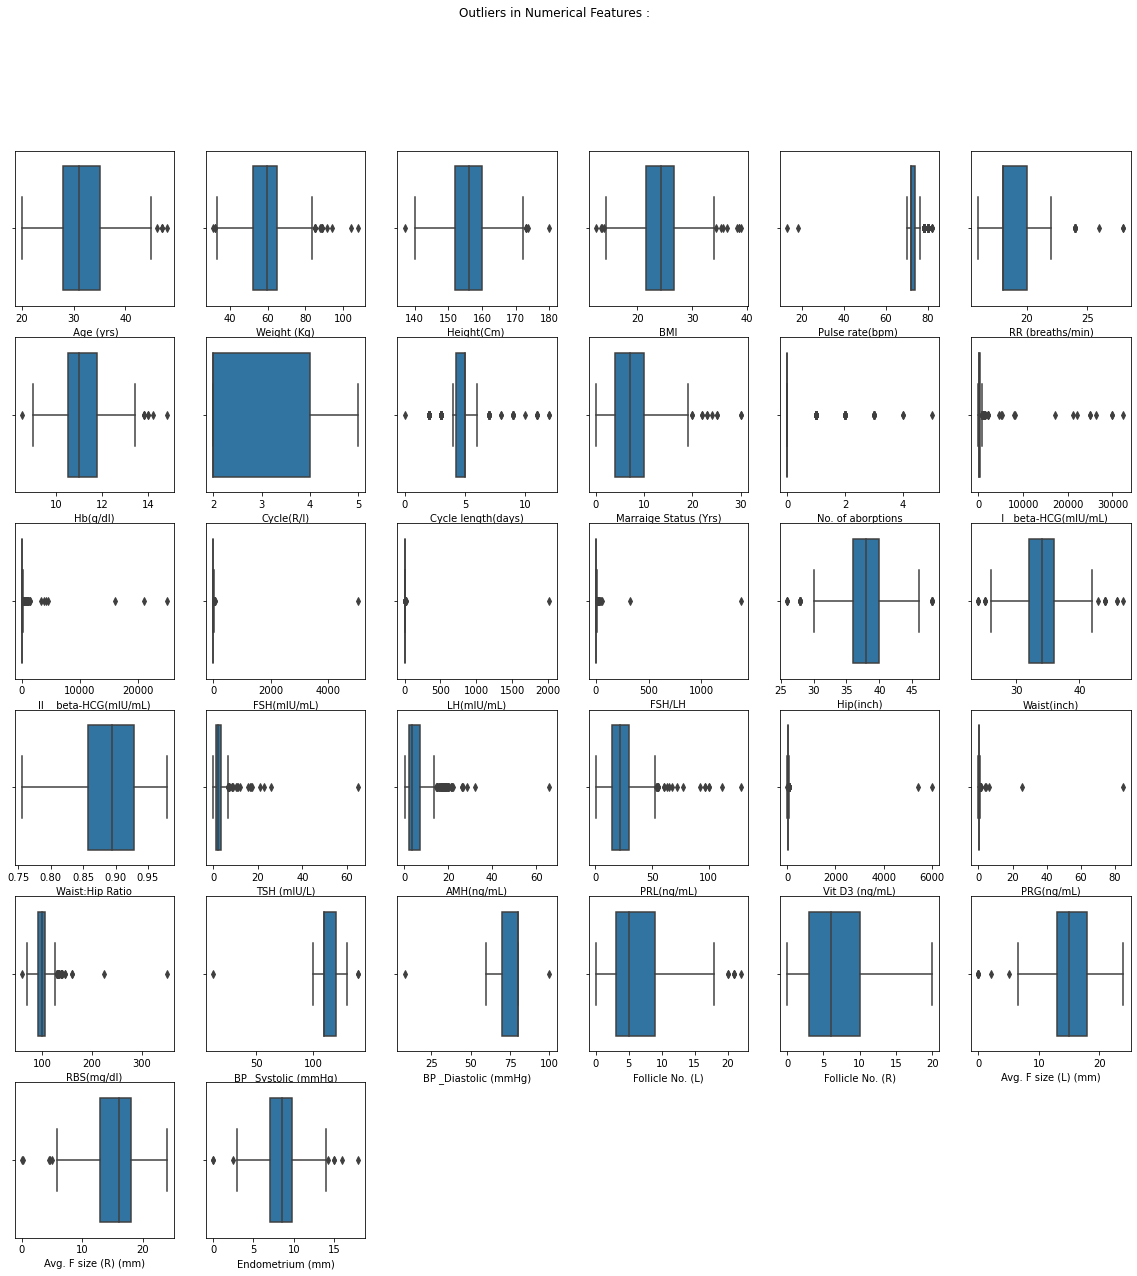

In [ ]:
#boxplot
plt.figure(figsize=[20,20])
plt.suptitle("Outliers in Numerical Features :")
for i in range(0,len(num_col)):
  plt.subplot(6,6,i+1)
  sns.boxplot(x=df[num_col[i]])

In [ ]:
#correlation matrix
df.corr()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N)
Age (yrs),1.000000,-0.030984,-0.119885,0.019923,-0.011836,0.045634,0.088748,-0.023686,-0.085473,0.052959,...,-0.034234,-0.025916,0.072437,0.066779,-0.113809,-0.158386,-2.096918e-02,-0.082677,-0.100115,-0.171349
Weight (Kg),-0.030984,1.000000,0.419808,0.901799,0.071354,0.020101,0.045339,0.009363,0.201575,-0.004452,...,0.162872,-0.065109,0.028122,0.129210,0.171896,0.124669,-2.351731e-02,-0.075220,-0.009452,0.209969
Height(Cm),-0.119885,0.419808,1.000000,-0.006900,0.039409,-0.073608,-0.030492,0.025962,-0.021780,0.007573,...,0.032853,0.015610,-0.068720,0.009094,0.102968,0.075560,-2.741536e-02,0.058357,-0.056273,0.065465
BMI,0.019923,0.901799,-0.006900,1.000000,0.061171,0.050287,0.064229,0.002554,0.235763,-0.007613,...,0.159936,-0.078036,0.070393,0.138536,0.142412,0.104518,-1.358200e-02,-0.113157,0.011024,0.198702
Blood Group,-0.011836,0.071354,0.039409,0.061171,1.000000,0.047865,-0.022707,-0.001652,0.123310,-0.008454,...,-0.034770,0.067994,0.031264,0.051543,0.058719,0.014200,-3.759934e-02,-0.017517,-0.015257,0.033701
Pulse rate(bpm),0.045634,0.020101,-0.073608,0.050287,0.047865,1.000000,0.305676,-0.052796,0.103416,0.006818,...,0.059712,-0.039055,-0.025021,0.007676,0.041534,0.049168,-4.867105e-02,-0.034141,-0.040456,0.092699
RR (breaths/min),0.088748,0.045339,-0.030492,0.064229,-0.022707,0.305676,1.000000,-0.038693,0.012769,0.005754,...,0.137533,-0.054183,0.013981,0.057322,0.069848,0.012856,-2.919643e-02,-0.020780,-0.066551,0.038641
Hb(g/dl),-0.023686,0.009363,0.025962,0.002554,-0.001652,-0.052796,-0.038693,1.000000,0.040443,-0.052550,...,0.077310,0.011980,0.053583,0.000475,0.062314,0.073459,3.087933e-02,0.023528,-0.063592,0.087809
Cycle(R/I),-0.085473,0.201575,-0.021780,0.235763,0.123310,0.103416,0.012769,0.040443,1.000000,-0.204673,...,0.208929,-0.006537,0.051787,0.082659,0.293743,0.253369,3.437944e-02,0.015318,0.039612,0.401837
Cycle length(days),0.052959,-0.004452,0.007573,-0.007613,-0.008454,0.006818,0.005754,-0.052550,-0.204673,1.000000,...,-0.077174,0.029240,-0.013013,-0.078956,-0.092381,-0.160579,-5.678838e-02,-0.017618,-0.014630,-0.183811


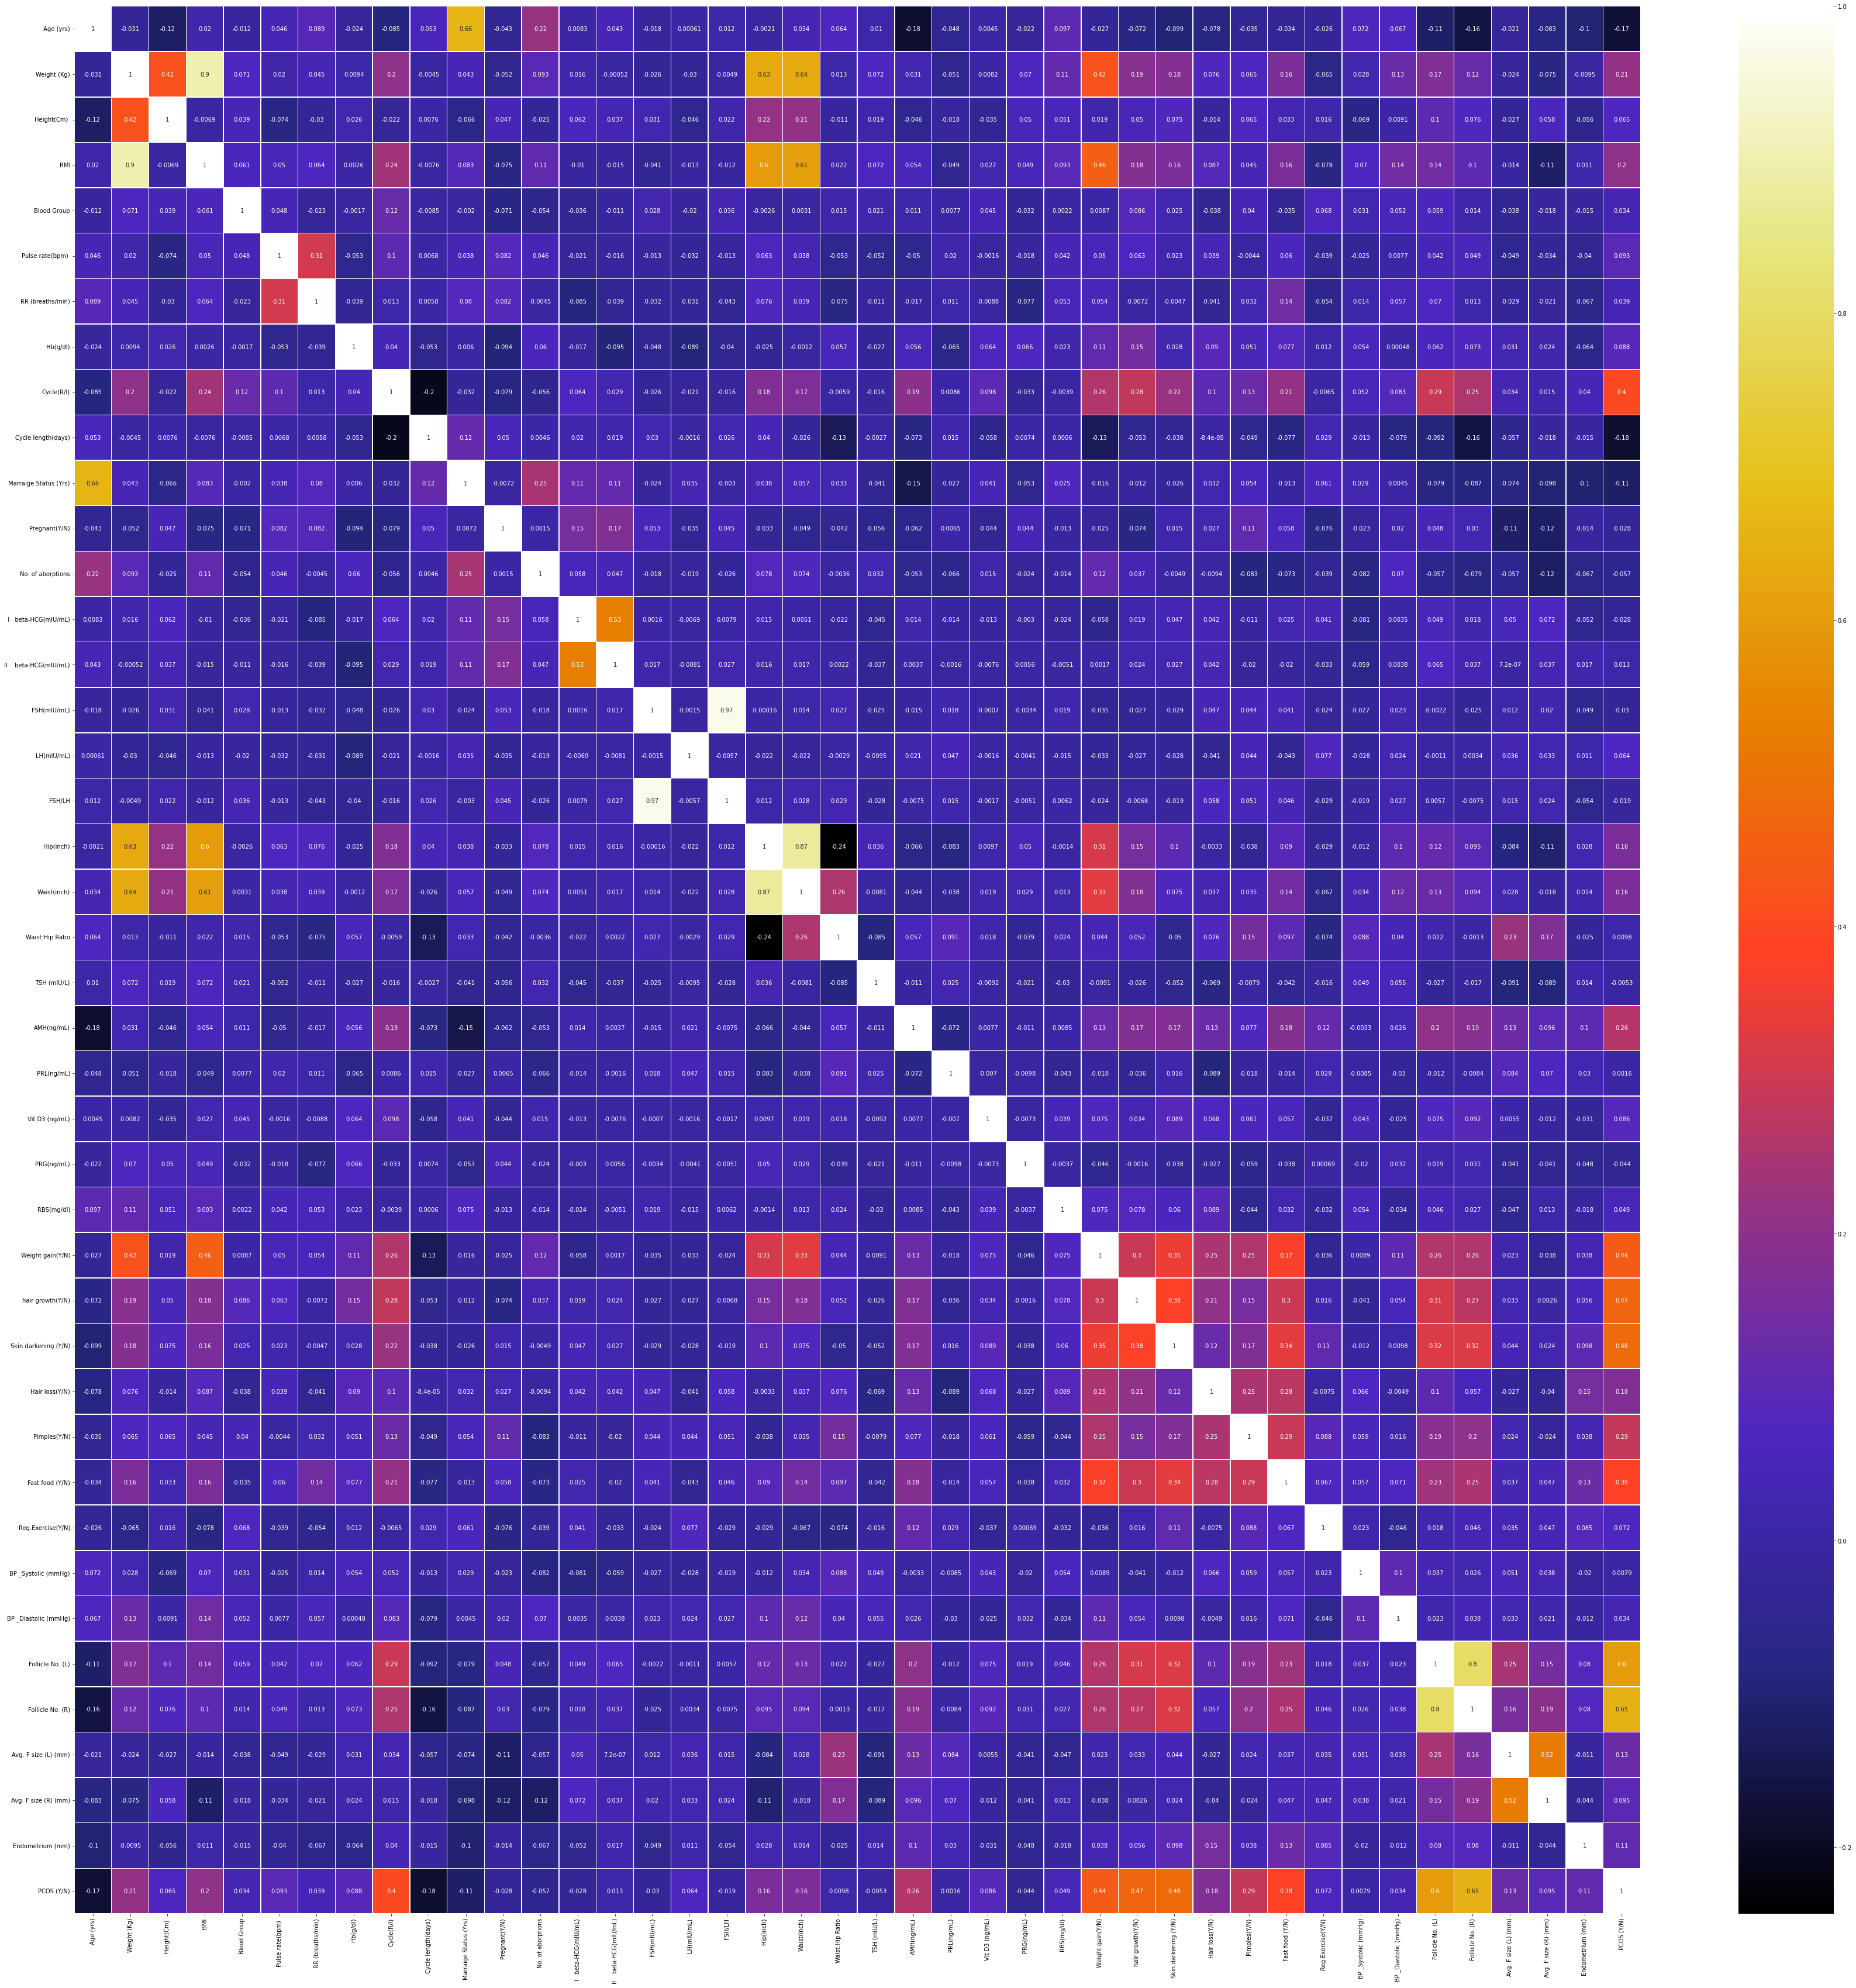

In [ ]:
#correlation heatmap
fig, ax = plt.subplots(figsize=(60,60))
sns.heatmap(df.corr(),cmap="CMRmap", annot=True,linewidths=.5,ax=ax)
plt.show()

In [ ]:
#to get highly correlated features
numeric = df[num_col]
correlation = numeric.corr()
high_corr=[]

for c1 in num_col:
  for c2 in num_col:
    if c1 != c2 and c2 not in high_corr and correlation[c1][c2] > 0.98:
      high_corr.append(c1)

In [ ]:
#no features have correlation higher than 0.98
high_corr

[]

In [ ]:
#x-independent features y-dependent features
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

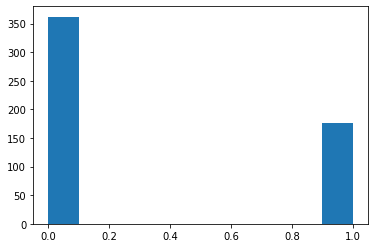

In [ ]:
plt.hist(y)
plt.show()

means the dataset is unbalanced

In [ ]:
#train test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [ ]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)

X_new_train = pca.fit_transform(X_train)
X_new_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [ ]:
len(X_new_train[0])

33

number of features reduced to 33

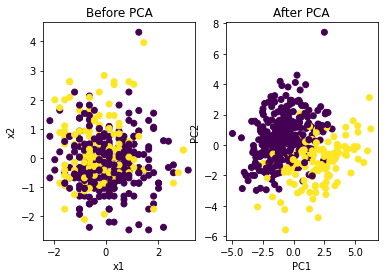

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new_train[:,0], X_new_train[:,1], c=y_train)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

**LOGISTIC REGRESSION (BEFORE SMOTE)**

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_new_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_new_test)

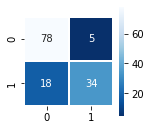


Accuracy :  0.8296296296296296

F1 score :  0.7472527472527474


In [ ]:
#evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred))
print("\nF1 score : ",f1_score(y_test,y_pred))

**LOGISTIC REGRESSION (AFTER SMOTE)**

balancing data using smote (oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

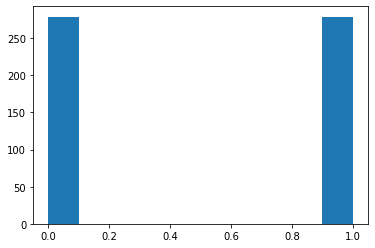

In [ ]:
plt.hist(y_train)
plt.show()

In [ ]:
#standardization and pca
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)

X_new_train = pca.fit_transform(X_train)
X_new_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

In [ ]:
len(X_new_train[0])

32

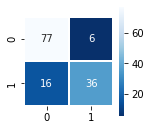


Accuracy after smote :  0.837037037037037

F1 score after smote :  0.7659574468085107


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_new_train, y_train)
y_pred = classifier.predict(X_new_test)
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy after smote : ",accuracy_score(y_test,y_pred))
print("\nF1 score after smote : ",f1_score(y_test,y_pred))

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_new_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_new_test)

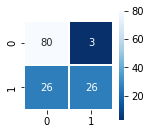


Accuracy after smote :  0.7851851851851852

F1 score after smote :  0.6419753086419753


In [ ]:
from sklearn import metrics 
cm_rf=metrics.confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(2,2))
sns.heatmap(cm_rf, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy after smote : ",accuracy_score(y_test,y_pred_rf))
print("\nF1 score after smote : ",f1_score(y_test,y_pred_rf))


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_new_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_new_test)

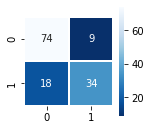


Accuracy after smote :  0.8

F1 score after smote :  0.7157894736842104


In [ ]:
from sklearn import metrics 
cm_dt=metrics.confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(2,2))
sns.heatmap(cm_dt, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy after smote : ",accuracy_score(y_test,y_pred_dt))
print("\nF1 score after smote : ",f1_score(y_test,y_pred_dt))

**SVM**

In [ ]:
from sklearn.svm import SVC
svc=SVC(random_state=0)
svc.fit(X_new_train,y_train)

SVC(random_state=0)

In [ ]:
y_pred_svc = svc.predict(X_new_test)

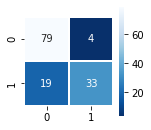


Accuracy after smote :  0.8296296296296296

F1 score after smote :  0.7415730337078652


In [ ]:
from sklearn import metrics 
cm_svc=metrics.confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(2,2))
sns.heatmap(cm_svc, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy after smote : ",accuracy_score(y_test,y_pred_svc))
print("\nF1 score after smote : ",f1_score(y_test,y_pred_svc))

**SVM HYPERTUNING**

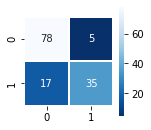


Accuracy after smote :  0.837037037037037

F1 score after smote :  0.7608695652173914


In [ ]:
svc1=SVC(kernel="rbf",C=100,gamma=0.001,random_state=0)
svc1.fit(X_new_train,y_train)
y_pred_svc1 = svc1.predict(X_new_test)
from sklearn import metrics 
cm_svc1=metrics.confusion_matrix(y_test,y_pred_svc1)
plt.figure(figsize=(2,2))
sns.heatmap(cm_svc1, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy after smote : ",accuracy_score(y_test,y_pred_svc1))
print("\nF1 score after smote : ",f1_score(y_test,y_pred_svc1))

In [ ]:
#svc2=SVC(kernel="linear")
#svc2.fit(X_new_train,y_train)
#y_pred_svc2 = svc2.predict(X_new_test)
#from sklearn import metrics 
#cm_svc2=metrics.confusion_matrix(y_test,y_pred_svc2)
#plt.figure(figsize=(2,2))
#sns.heatmap(cm_svc2, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
#plt.show()
#print("\nAccuracy after smote : ",accuracy_score(y_test,y_pred_svc2))
#print("\nF1 score after smote : ",f1_score(y_test,y_pred_svc2))